In [15]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Preprocessing

In [16]:
url = "D:\\RPI course info\\data analytics\\final project\\NASA data\\monthly precipitation.csv"
df = pd.read_csv(url)

In [17]:
start_date = '2000-06'
end_date = '2021-09'
date_format = '%Y-%m'
dtObj = datetime.strptime(start_date, date_format)
end_date = datetime.strptime(end_date, date_format)
date_list = [dtObj]

for i in range(300):
    dtObj = dtObj + relativedelta(months=1)
    date_list.append(dtObj)
    if dtObj == end_date:
        break
#date_list

In [18]:
df_date = pd.DataFrame(date_list, columns =['date'])
df1 = pd.concat([df_date, df[['monthly precipitation']]], axis = 1)

In [19]:
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1 = df1[df1['year']!=2000]


In [20]:
# testtesttest
df_tmp = df1.copy()
df_tmp['month'] = df_tmp['month'].astype(str)
df_tmp['month'] = 'precipitation_month_' + df_tmp['month']
df_tmp.reset_index(inplace=True)
df_tmp = df_tmp.pivot(index='year', columns='month', values='monthly precipitation')
column_names = ['precipitation_month_1','precipitation_month_2'
               ,'precipitation_month_3','precipitation_month_4'
               ,'precipitation_month_5','precipitation_month_6'
               ,'precipitation_month_7','precipitation_month_8'
               ,'precipitation_month_9','precipitation_month_10'
               ,'precipitation_month_11','precipitation_month_12']
df_tmp = df_tmp.reindex(columns=column_names)
df_tmp.reset_index(inplace=True)
df_tmp = df_tmp[['precipitation_month_1',
                 'precipitation_month_2',
                 'precipitation_month_3',
                 'precipitation_month_4',
                 'precipitation_month_5']]

In [21]:
url2 = "D:\\RPI course info\\data analytics\\final project\\wheat data\\hard_red_winter.xlsx"
df_yield = pd.read_excel(url2)
df_input = pd.concat([df_tmp, df_yield], axis=1)

In [22]:
df_t = pd.read_excel("D:/RPI course info/data analytics/final project/NASA data/monthly temperature.xlsx")
df_input = pd.concat([df_input, df_t], axis=1)
df_input = df_input.drop(columns=['year'])
df_input

,precipitation_month_1,precipitation_month_2,precipitation_month_3,precipitation_month_4,precipitation_month_5,yield,month_1_temp,month_2_temp,month_3_temp,month_4_temp,month_5_temp
0,385.338348,604.303955,381.290405,525.627197,1274.295410,36.724910,29.725,27.525,39.350,53.400,61.800
1,312.660919,199.784668,262.191132,574.182495,797.020630,31.128462,31.500,33.825,33.975,51.325,58.025
2,145.666412,371.804535,545.852356,827.827087,930.501465,41.794686,30.150,29.000,40.600,52.900,59.775
3,348.484192,352.944489,662.845642,682.885376,733.650879,36.596881,27.625,30.325,46.225,52.400,61.550
4,471.704102,362.303040,413.530609,663.098999,943.591980,37.767107,27.700,36.950,42.250,51.750,59.600
5,138.070877,97.943512,540.049927,727.396973,726.521301,31.986538,39.150,31.750,41.575,55.925,62.625
6,289.048889,342.577271,895.841125,859.071350,1708.040527,37.155105,26.375,28.600,48.775,48.425,62.250
7,153.777115,354.473938,350.607483,635.788452,1439.599243,40.003902,26.925,30.975,40.650,47.625,59.350
8,140.184113,207.969299,437.267090,1096.285400,674.149597,38.101864,28.875,35.950,40.550,49.075,59.650
9,286.502380,340.381165,484.896179,877.464294,1242.444946,42.090072,26.275,27.425,42.275,53.150,58.225


In [62]:
df_input.to_excel('model_input.xlsx')

In [44]:
X = df_input.drop(columns=['yield'])
y = df_input[['yield']]

# Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_std, columns = X.columns)
X

,precipitation_month_1,precipitation_month_2,precipitation_month_3,precipitation_month_4,precipitation_month_5,month_1_temp,month_2_temp,month_3_temp,month_4_temp,month_5_temp
0,1.199464,2.844684,-0.514846,-0.798820,0.285508,0.021357,-0.654106,-0.716173,0.854240,0.760946
1,0.488845,-1.102729,-1.176178,-0.599035,-0.901726,0.622178,0.675206,-2.024762,0.108278,-1.011986
2,-1.143980,0.575889,0.398930,0.444609,-0.569689,0.165216,-0.342878,-0.411850,0.674490,-0.190097
3,0.839115,0.391848,1.048567,-0.151767,-1.059360,-0.689473,-0.063301,0.957603,0.494740,0.643534
4,2.043924,0.483171,-0.335823,-0.233180,-0.537126,-0.664087,1.334587,-0.010144,0.261065,-0.272286
5,-1.218247,-2.096524,0.366710,0.031380,-1.077095,3.211632,0.237377,-0.174478,1.761978,1.148408
6,0.257973,0.290681,2.342339,0.573166,1.364462,-1.112587,-0.427279,1.578421,-0.934272,0.972289
7,-1.064676,0.406772,-0.685221,-0.345551,0.696706,-0.926417,0.073851,-0.399677,-1.221872,-0.389698
8,-1.197585,-1.022861,-0.204020,1.549205,-1.207372,-0.266360,1.123585,-0.424023,-0.700597,-0.248803
9,0.233074,0.269251,0.060454,0.648846,0.206279,-1.146436,-0.675206,-0.004058,0.764365,-0.918056


# modeling

In [71]:
from sklearn.ensemble import RandomForestRegressor

n_estimators_list = [100,300,500,700]
max_depth_list = [3,4,5,6,7]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        rf = RandomForestRegressor(n_estimators = n_estimators,
                                   max_depth=max_depth,
                                   random_state = 0)
        print('n_estimators:'+str(n_estimators)
              +' max_depth:'+str(max_depth)+
              ' rmse:'+str(LeaveOneOut_validation(rf,X,y)))


n_estimators:100 max_depth:3 rmse:4.806867211974307
n_estimators:100 max_depth:4 rmse:4.81029593912702
n_estimators:100 max_depth:5 rmse:4.794550511632239
n_estimators:100 max_depth:6 rmse:4.801527290644424
n_estimators:100 max_depth:7 rmse:4.810359993914521
n_estimators:300 max_depth:3 rmse:4.840345307645903
n_estimators:300 max_depth:4 rmse:4.818055545303003
n_estimators:300 max_depth:5 rmse:4.840582696127657
n_estimators:300 max_depth:6 rmse:4.82782185042032
n_estimators:300 max_depth:7 rmse:4.81907908466899
n_estimators:500 max_depth:3 rmse:4.855101422654656
n_estimators:500 max_depth:4 rmse:4.8331274737229375
n_estimators:500 max_depth:5 rmse:4.8390188174418185
n_estimators:500 max_depth:6 rmse:4.832987534511582
n_estimators:500 max_depth:7 rmse:4.823375878238689
n_estimators:700 max_depth:3 rmse:4.845068268430644
n_estimators:700 max_depth:4 rmse:4.835543650387363
n_estimators:700 max_depth:5 rmse:4.840449581085746
n_estimators:700 max_depth:6 rmse:4.836090345495909
n_estimators:

In [72]:
rf = RandomForestRegressor(n_estimators = 100,
                           max_depth=5,
                           random_state = 0)

In [75]:
import xgboost as xg

max_depth_list = [4,5,6,7,8]
min_child_weight_list = [1,2,3,4,5]
for max_depth in max_depth_list:
    for min_child_weight in min_child_weight_list:
        xgb_linear = xg.XGBRegressor(objective ='reg:linear',
                                        max_depth=max_depth,
                                        min_child_weight=min_child_weight,
                                        max_leaves=max_leaves,
                                        n_estimators = 10,
                                        seed = 123)
        print('max_depth:'+str(max_depth)+
                  ' min_child_weight:'+str(min_child_weight)+
                  ' rmse:'+str(LeaveOneOut_validation(xgb_linear,X,y)))
#xgb_tweedie = xg.XGBRegressor(objective ='reg:tweedie', n_estimators = 10, seed = 123)

max_depth:4 min_child_weight:1 rmse:4.75396270800269
max_depth:4 min_child_weight:2 rmse:4.882592074549768
max_depth:4 min_child_weight:3 rmse:5.145121406092007
max_depth:4 min_child_weight:4 rmse:5.018096239924533
max_depth:4 min_child_weight:5 rmse:5.002360674629478
max_depth:5 min_child_weight:1 rmse:4.752590023120308
max_depth:5 min_child_weight:2 rmse:4.880864964200236
max_depth:5 min_child_weight:3 rmse:5.145121406092007
max_depth:5 min_child_weight:4 rmse:5.018096239924533
max_depth:5 min_child_weight:5 rmse:5.002360674629478
max_depth:6 min_child_weight:1 rmse:4.752590023120308
max_depth:6 min_child_weight:2 rmse:4.880864964200236
max_depth:6 min_child_weight:3 rmse:5.145121406092007
max_depth:6 min_child_weight:4 rmse:5.018096239924533
max_depth:6 min_child_weight:5 rmse:5.002360674629478
max_depth:7 min_child_weight:1 rmse:4.752590023120308
max_depth:7 min_child_weight:2 rmse:4.880864964200236
max_depth:7 min_child_weight:3 rmse:5.145121406092007
max_depth:7 min_child_weight:

In [76]:
xgb_linear = xg.XGBRegressor(objective ='reg:linear',
                                        n_estimators = 10,
                                        seed = 123)

In [48]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [77]:
from sklearn.neighbors import KNeighborsRegressor

acc_list = []
k_list = range(2,10)
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors = k)
    rmse = LeaveOneOut_validation(knn,X,y)
    acc_list.append(rmse)
knn_bestk = pd.DataFrame(list(zip(k_list, acc_list)),
                                columns = ['k', 'RMSE'])
knn_bestk

,k,RMSE
0,2,5.199644
1,3,4.884486
2,4,4.278526
3,5,4.592731
4,6,4.602784
5,7,4.662829
6,8,4.618196
7,9,4.844086


In [78]:
knn = KNeighborsRegressor(n_neighbors = 4)

In [50]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import numpy as np

def LeaveOneOut_validation(model,X,y):
    cv = LeaveOneOut()
    rmse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    rmse = np.sqrt(np.mean(np.absolute(rmse_scores)))
    #r2_scores = cross_val_score(model, X, y, scoring='r2',
    #                         cv=cv, n_jobs=-1)
    #r_square = np.mean(r2_scores)
    return rmse

In [79]:
model_list = [rf, xgb_linear, xgb_tweedie, svr_rbf, svr_lin, svr_poly, knn]
ml_type = ['Random Forest', 'XGBoost_linear', 'XGBoost_tweedie',
           'SVM(RBF)', 'SVM(linear)', 'SVM(polynomial)', 'KNN']
rmse_list = []
#r_square_list = []
for model in model_list:
    rmse = LeaveOneOut_validation(model,X,y)
    rmse_list.append(rmse)
    #r_square_list.append(r_square)
model_validation = pd.DataFrame(list(zip(ml_type, rmse_list)),
                                columns = ['ML_type', 'RMSE'])
model_validation


,ML_type,RMSE
0,Random Forest,4.794551
1,XGBoost_linear,4.752590
2,XGBoost_tweedie,11.903273
3,SVM(RBF),4.652871
4,SVM(linear),10.314442
5,SVM(polynomial),4.480130
6,KNN,4.278526


# Feature Importance Analysis

<ipython-input-56-be34311e831e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf.fit(X,y)


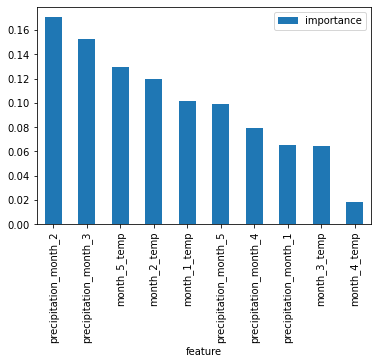

In [56]:
import matplotlib.pyplot as plt

rf_model = rf.fit(X,y)
importance_rf = pd.DataFrame(rf_model.feature_importances_, columns=['importance'])
X_arr = pd.DataFrame(np.array(X.columns), columns=['feature'])
importance_rf = pd.concat([X_arr, importance_rf], axis=1)
importance_rf.sort_values(by = ['importance'], inplace=True, ascending = False)
importance_rf.plot(x ='feature', y='importance', kind = 'bar')
plt.show()

[21:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


<AxesSubplot:xlabel='feature'>

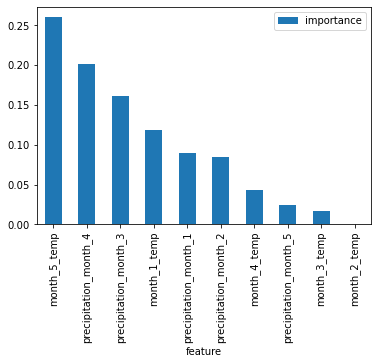

In [57]:
xgb_model = xgb.fit(X,y)
importance_xgb = pd.DataFrame(xgb_model.feature_importances_, columns=['importance'])
X_arr = pd.DataFrame(np.array(X.columns), columns=['feature'])
importance_xgb = pd.concat([X_arr, importance_xgb], axis=1)
importance_xgb.sort_values(by = ['importance'], inplace=True, ascending = False)
importance_xgb.plot(x ='feature', y='importance', kind = 'bar')
plt.show()

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


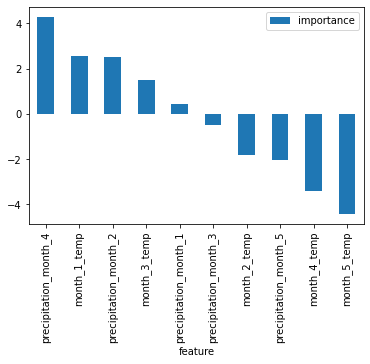

In [60]:
svr_lin_model = svr_lin.fit(X,y)
importance_svr_lin = pd.DataFrame(svr_lin_model.coef_[0], columns=['importance'])
X_arr = pd.DataFrame(np.array(X.columns), columns=['feature'])
importance_svr_lin = pd.concat([X_arr, importance_svr_lin], axis=1)
importance_svr_lin.sort_values(by = ['importance'], inplace=True, ascending = False)
importance_svr_lin.plot(x ='feature', y='importance', kind = 'bar')
plt.show()